In [16]:
import numpy as np
import glob
import pandas as pd
import ast
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, ConvLSTM2D, TimeDistributed, BatchNormalization, Input, Dropout, Activation, Reshape, MaxPooling3D
from tensorflow.keras.optimizers import Adam

In [2]:
# Read data
import pickle
features = pickle.load(open("/home/mids-w251-fa2020-fp/feat2.txt", "rb"))
labels = pickle.load(open("/home/mids-w251-fa2020-fp/labels2.txt", "rb"))

In [3]:
X = np.array(features)
X = X.swapaxes(2,3)
X = X[...,np.newaxis]
print(X.shape)

(259, 440, 9, 2, 1)


In [4]:
Y = np.array(labels)
print(Y.shape)

(259,)


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=24601)

In [6]:
440/15*60/14

125.71428571428571

In [7]:
440 * 9 * 2 * 200

1584000

In [28]:
from tensorflow.keras.layers import Conv1D, LeakyReLU, Convolution2D

seq = tf.keras.Sequential()
seq.add(ConvLSTM2D(filters=10, kernel_size=(3, 1),
                   input_shape=(440, 9, 2, 1),
                   data_format='channels_last',
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(MaxPooling3D(pool_size=(1,3,1)))
seq.add(ConvLSTM2D(filters=10, kernel_size=(3, 1),
                   data_format='channels_last',
                   padding='valid', return_sequences=True))
seq.add(BatchNormalization())
seq.add(MaxPooling3D(pool_size=(1,1,2)))
seq.add(Reshape((440, 10)))
seq.add(Conv1D(3, kernel_size=3, strides=1,))
seq.add(LeakyReLU(alpha=0.03))
seq.add(Flatten())
seq.add(Dense(128))
seq.add(LeakyReLU(alpha=0.03))
seq.add(Dropout(0.1))
seq.add(Dense(1))

In [29]:
seq.summary()
seq.compile(loss="mse", optimizer=Adam(lr=0.001, decay=1e-6), metrics=["mse", "mae"])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_10 (ConvLSTM2D) (None, 440, 9, 2, 10)     1360      
_________________________________________________________________
batch_normalization_10 (Batc (None, 440, 9, 2, 10)     40        
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 440, 3, 2, 10)     0         
_________________________________________________________________
conv_lst_m2d_11 (ConvLSTM2D) (None, 440, 1, 2, 10)     2440      
_________________________________________________________________
batch_normalization_11 (Batc (None, 440, 1, 2, 10)     40        
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 440, 1, 1, 10)     0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 440, 10)          

In [30]:
history = seq.fit(X_train, Y_train, epochs=100)

Train on 220 samples
Epoch 1/100
220/220 [==============================] - 64s 289ms/sample - loss: 290.0811 - mean_squared_error: 290.0811 - mean_absolute_error: 14.0189
Epoch 2/100
220/220 [==============================] - 59s 270ms/sample - loss: 144.0072 - mean_squared_error: 144.0072 - mean_absolute_error: 9.8012
Epoch 3/100
220/220 [==============================] - 59s 267ms/sample - loss: 109.8643 - mean_squared_error: 109.8643 - mean_absolute_error: 9.1976
Epoch 4/100
220/220 [==============================] - 60s 272ms/sample - loss: 98.2304 - mean_squared_error: 98.2304 - mean_absolute_error: 8.7327
Epoch 5/100
220/220 [==============================] - 58s 262ms/sample - loss: 97.9131 - mean_squared_error: 97.9131 - mean_absolute_error: 8.5074
Epoch 6/100
220/220 [==============================] - 58s 265ms/sample - loss: 91.4613 - mean_squared_error: 91.4613 - mean_absolute_error: 8.5104
Epoch 7/100
220/220 [==============================] - 62s 283ms/sample - loss: 93.9

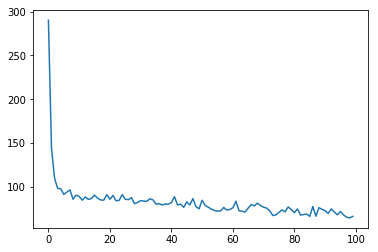

In [31]:
plt.plot(history.history['mean_squared_error'])

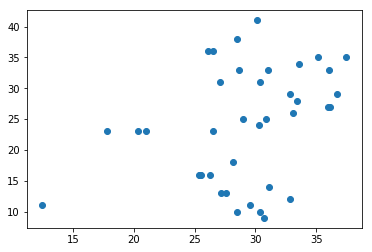

In [32]:
plt.scatter(seq.predict(X_test), Y_test)

In [33]:
seq.evaluate(X_test, Y_test)

39/39 [==============================] - 6s 156ms/sample - loss: 105.1108 - mean_squared_error: 105.1108 - mean_absolute_error: 8.3204


[105.11077822171725, 105.11078, 8.320433]

In [57]:
seq.predict(X_test)

array([[-0.00199934],
       [-0.00429186],
       [-0.01646508],
       [-0.00326372],
       [-0.00522727],
       [-0.00769043],
       [-0.0085856 ],
       [-0.00163226],
       [-0.00626482],
       [-0.00807292],
       [-0.0167161 ],
       [-0.00090882],
       [-0.00493974],
       [-0.00364621],
       [-0.00396221],
       [-0.00279058],
       [-0.00359003],
       [ 0.00138091],
       [-0.01861896],
       [-0.00310312],
       [-0.00509726],
       [-0.00347153],
       [-0.0008237 ],
       [-0.00191619],
       [-0.004611  ],
       [-0.01666888],
       [-0.00377885],
       [-0.00454215],
       [ 0.00107718],
       [-0.00369215],
       [-0.00335738],
       [-0.00259303],
       [-0.01787031],
       [-0.00526399],
       [-0.00158647],
       [-0.00227021],
       [-0.01645203],
       [-0.00183659],
       [-0.00071952]], dtype=float32)

In [55]:
Y_test[0:10]

array([33, 35, 23, 16, 28, 26, 31, 18,  9, 11])